<center>
    <img src="Desktop/py4e/lantern_analyst_logo.png" width="300" height="300"alt="lantern logo"  />
</center>

# Plotting Charts


## Energy Delivered Among Distribution Companies in Nigeria (2014-2021)


This analysis relies heavily on **Pandas** and **Numpy** Libraries.
Dataset used is got from **NERC** (Nigerian Electricity Regulatory Commission) but downloaded onto a *csv* format. <p> There are a total of 11 distribution companies in Nigeria. And data represented here shows energy consumed/delivered in Gigawatt-hours (GWh)</p> <br>*Note that original data would be wrangled in order to give a more desirable analysis*</br>


<H3>First things; import pandas and numpy to the code cells</H3>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    * It is expect your system has Python 3+, Numpy, Pandas, openpyxl already installed
    * Access to the csv file
</div>

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

#Read data into pandas dataframe
df_energy = pd.read_excel(
    'Desktop/py4e/Nigerian_energy_consumption_data.xlsx',
    sheet_name='Energy Delivered',
    skiprows=range(11),
    skipfooter=1)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [5]:
# print the dimensions of the dataframe
print(df_energy.shape)
df_energy.head() #To view dataset first five rows

(11, 14)


,Type,CODE,DNAME,AREA,AreaName,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,TCN,AEDC,Abuja Electricity Distribution Company,100,North Central,2298,2566,2880,3000,3354,3621,3890,3750,3987
1,CAN,IKEDC,Ikeja Electricity Distribution Company,101,South West,2355,2580,3011,2811,2873,3510,3600,4100,4512
2,LOG,BEDC,Benin Electricity Distribution Company,103,South South,2011,2333,2410,2588,2306,2519,2996,2744,3310
3,CAN,PHED,Portharcourt Electricity Distribution Company,105,South South,1023,1566,2411,2001,2074,1941,2511,2799,3100
4,CAN,IBEDC,Ibadan Electricity Distribution Company,110,South West,2411,2568,2611,3201,3385,3444,3577,3975,4500


<H3> Drop and rename some column names </H3>

In [14]:
df_energy.drop(['Type', 'AREA'], axis=1, inplace=True)
df_energy.rename(columns={'DNAME':'Distribution Company', 'AreaName':'Zone'}, inplace=True)
df_energy.head()

,CODE,Distribution Company,Zone,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AEDC,Abuja Electricity Distribution Company,North Central,2298,2566,2880,3000,3354,3621,3890,3750,3987
1,IKEDC,Ikeja Electricity Distribution Company,South West,2355,2580,3011,2811,2873,3510,3600,4100,4512
2,BEDC,Benin Electricity Distribution Company,South South,2011,2333,2410,2588,2306,2519,2996,2744,3310
3,PHED,Portharcourt Electricity Distribution Company,South South,1023,1566,2411,2001,2074,1941,2511,2799,3100
4,IBEDC,Ibadan Electricity Distribution Company,South West,2411,2568,2611,3201,3385,3444,3577,3975,4500


In [15]:
# Examine the types of the column labels
all(isinstance(column, str) for column in df_energy.columns)

False

In [17]:
df_energy.columns = list(map(str, df_energy.columns))

# check the column labels types now
all(isinstance(column, str) for column in df_energy.columns)

True

<H3> Set Codes as Index for easier reference </H3>

In [28]:
#Set code as index
df_energy.set_index('CODE', inplace=True)

#And also trim the 'Distribution Company' column to remove 'distribution company text'
df_energy['Distribution Company']= df_energy['Distribution Company'].str.replace(' Distribution Company', '')
# Let's view the first five elements and see how the dataframe was changed
df_energy.head()

,Distribution Company,Zone,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
CODE,,,,,,,,,,,,
AEDC,Abuja Electricity,North Central,2298,2566,2880,3000,3354,3621,3890,3750,3987,29346
IKEDC,Ikeja Electricity,South West,2355,2580,3011,2811,2873,3510,3600,4100,4512,29352
BEDC,Benin Electricity,South South,2011,2333,2410,2588,2306,2519,2996,2744,3310,23217
PHED,Portharcourt Electricity,South South,1023,1566,2411,2001,2074,1941,2511,2799,3100,19426
IBEDC,Ibadan Electricity,South West,2411,2568,2611,3201,3385,3444,3577,3975,4500,29672


<H3> Add Total Column </H3>

In [32]:
df_energy['Total'] = df_energy.sum(axis=1)

# let's view the first five elements and see how the dataframe was changed
df_energy.head()

,Distribution Company,Zone,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
CODE,,,,,,,,,,,,
AEDC,Abuja Electricity,North Central,2298,2566,2880,3000,3354,3621,3890,3750,3987,29346
IKEDC,Ikeja Electricity,South West,2355,2580,3011,2811,2873,3510,3600,4100,4512,29352
BEDC,Benin Electricity,South South,2011,2333,2410,2588,2306,2519,2996,2744,3310,23217
PHED,Portharcourt Electricity,South South,1023,1566,2411,2001,2074,1941,2511,2799,3100,19426
IBEDC,Ibadan Electricity,South West,2411,2568,2611,3201,3385,3444,3577,3975,4500,29672


In [31]:
# finally, let's create a list of years from 2014 - 2021
# this will come in handy when we start plotting the data
years = list(map(str, range(2014, 2022)))

years

['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

<H4>Import the `matplotlib` library.</H4>

In [30]:
# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.4.3


In [35]:
df_energy.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_energy.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

CODE,EKEDC,IBEDC,IKEDC,AEDC,BEDC
2014,2956,2568,2580,2566,2333
2015,3004,2611,3011,2880,2410
2016,3009,3201,2811,3000,2588
2017,2992,3385,2873,3354,2306
2018,3214,3444,3510,3621,2519


<H5> Plot an Area Chart </H5>

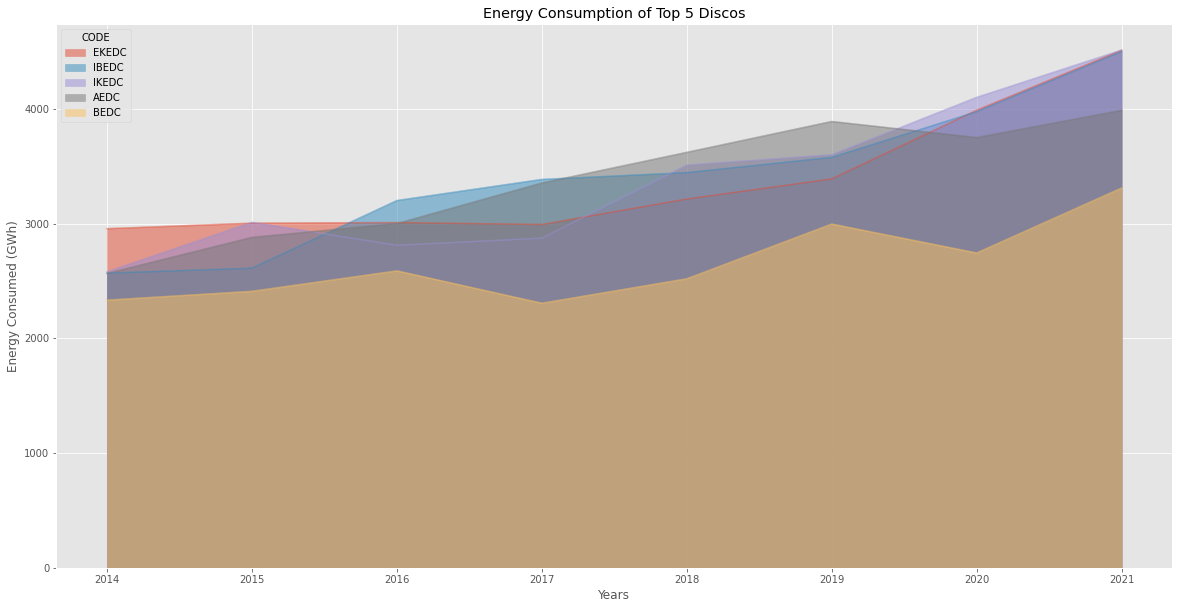

In [40]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             #alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Energy Consumption of Top 5 Discos')
plt.ylabel('Energy Consumed (GWh)')
plt.xlabel('Years')

plt.show()